In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
imdb, info = tfds.load("imdb_reviews",
                      with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW7IZ42/imdb_reviews-train.tfrecord*...…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW7IZ42/imdb_reviews-test.tfrecord*...:…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteW7IZ42/imdb_reviews-unsupervised.tfrec…

Dataset imdb_reviews downloaded and prepared to ~/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())
    
for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [ ]:
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [ ]:
vocab_size = 10000
embedding_dim=16
max_length = 120
trunc_type= 'post'
oov_tok=""

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
word_index

{'': 1,
 'the': 2,
 'and': 3,
 'a': 4,
 'of': 5,
 'to': 6,
 'is': 7,
 'br': 8,
 'in': 9,
 'it': 10,
 'i': 11,
 'this': 12,
 'that': 13,
 'was': 14,
 'as': 15,
 'for': 16,
 'with': 17,
 'movie': 18,
 'but': 19,
 'film': 20,
 "'s": 21,
 'on': 22,
 'you': 23,
 'not': 24,
 'are': 25,
 'his': 26,
 'he': 27,
 'have': 28,
 'be': 29,
 'one': 30,
 'all': 31,
 'at': 32,
 'by': 33,
 'they': 34,
 'an': 35,
 'who': 36,
 'so': 37,
 'from': 38,
 'like': 39,
 'her': 40,
 "'t": 41,
 'or': 42,
 'just': 43,
 'there': 44,
 'about': 45,
 'out': 46,
 "'": 47,
 'has': 48,
 'if': 49,
 'some': 50,
 'what': 51,
 'good': 52,
 'more': 53,
 'very': 54,
 'when': 55,
 'she': 56,
 'up': 57,
 'can': 58,
 'b': 59,
 'time': 60,
 'no': 61,
 'even': 62,
 'my': 63,
 'would': 64,
 'which': 65,
 'story': 66,
 'only': 67,
 'really': 68,
 'see': 69,
 'their': 70,
 'had': 71,
 'were': 72,
 'me': 73,
 'well': 74,
 'we': 75,
 'than': 76,
 'much': 77,
 'been': 78,
 'get': 79,
 'bad': 80,
 'will': 81,
 'people': 82,
 'do': 83,
 'al

In [ ]:
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, 
                       truncating = trunc_type)
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                1568      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161,909
Trainable params: 161,909
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(padded, training_labels_final, epochs=30, 
                  validation_data = (testing_padded, testing_labels_final))

Epoch 1/30
782/782 [==============================] - 101s 125ms/step - loss: 0.6946 - accuracy: 0.5000 - val_loss: 0.6989 - val_accuracy: 0.5036
Epoch 2/30
782/782 [==============================] - 95s 121ms/step - loss: 0.6897 - accuracy: 0.5344 - val_loss: 0.6916 - val_accuracy: 0.5239
Epoch 3/30
782/782 [==============================] - 97s 124ms/step - loss: 0.6357 - accuracy: 0.6384 - val_loss: 0.5992 - val_accuracy: 0.6933
Epoch 4/30
782/782 [==============================] - 95s 121ms/step - loss: 0.4229 - accuracy: 0.8073 - val_loss: 0.5979 - val_accuracy: 0.6988
Epoch 5/30
782/782 [==============================] - 95s 122ms/step - loss: 0.2843 - accuracy: 0.8855 - val_loss: 0.6735 - val_accuracy: 0.7068
Epoch 6/30
782/782 [==============================] - 96s 123ms/step - loss: 0.1810 - accuracy: 0.9332 - val_loss: 0.7549 - val_accuracy: 0.7318
Epoch 7/30
782/782 [==============================] - 95s 121ms/step - loss: 0.1230 - accuracy: 0.9546 - val_loss: 0.8248 - val_a

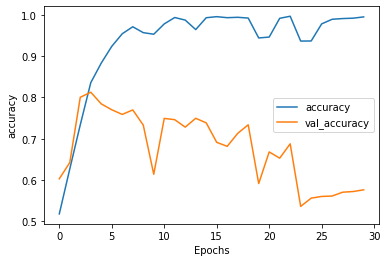

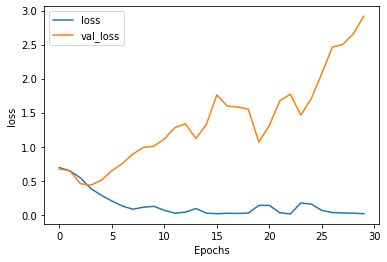

In [ ]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model = Sequential([
    Embedding(vocab_size, embedding_dim,
                             input_length=max_length),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               9600      
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 170,261
Trainable params: 170,261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])

history=model.fit(padded, training_labels_final, epochs=30,
            validation_data = (testing_padded,testing_labels_final))

Epoch 1/30
782/782 [==============================] - 59s 71ms/step - loss: 0.4947 - accuracy: 0.7375 - val_loss: 0.3750 - val_accuracy: 0.8314
Epoch 2/30
782/782 [==============================] - 50s 64ms/step - loss: 0.2946 - accuracy: 0.8815 - val_loss: 0.3548 - val_accuracy: 0.8459
Epoch 3/30
782/782 [==============================] - 48s 62ms/step - loss: 0.2248 - accuracy: 0.9148 - val_loss: 0.3808 - val_accuracy: 0.8396
Epoch 4/30
782/782 [==============================] - 48s 61ms/step - loss: 0.1720 - accuracy: 0.9384 - val_loss: 0.4455 - val_accuracy: 0.8284
Epoch 5/30
782/782 [==============================] - 49s 62ms/step - loss: 0.1272 - accuracy: 0.9555 - val_loss: 0.4969 - val_accuracy: 0.8118
Epoch 6/30
782/782 [==============================] - 48s 62ms/step - loss: 0.0849 - accuracy: 0.9717 - val_loss: 0.5807 - val_accuracy: 0.8225
Epoch 7/30
782/782 [==============================] - 47s 61ms/step - loss: 0.0520 - accuracy: 0.9831 - val_loss: 0.7331 - val_accuracy:

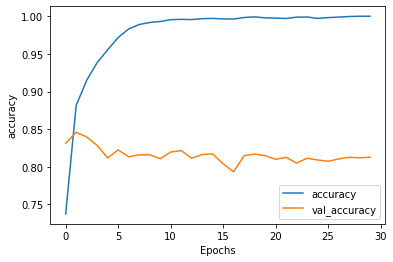

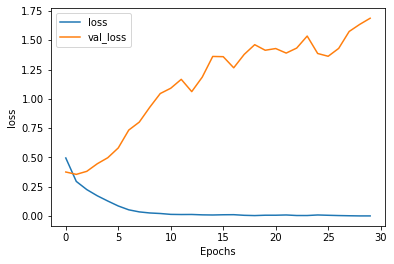

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
model.compile(loss="binary_crossentropy",
             optimizer='adam',
             metrics=['accuracy'])



In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

history=model.fit(padded, training_labels_final, epochs=30,
            validation_data = (testing_padded,testing_labels_final))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 10)                650       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 173,205
Trainable params: 173,205
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
782/782 [==============================] - 50s 60ms/step - loss: 0.4861 - accuracy: 0.7511 - val_loss: 

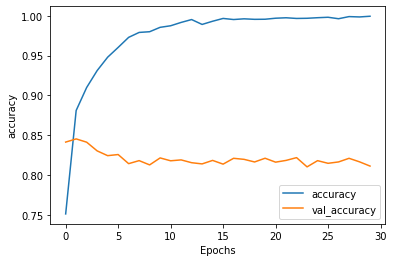

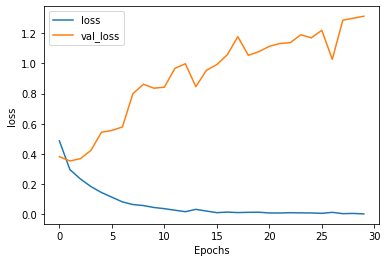

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')